In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from numpy import heaviside
from matplotlib.pyplot import gca,show
from IPython.display import Math, display
import numpy as np
import scipy as sp
import sympy as sym
from scipy.special import kv,zeta, polygamma, factorial, erf
from scipy import integrate
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
import cmasher as cmr
import mpmath as mp
from scipy.integrate import odeint, solve_ivp, ode, quad
import math
from mpmath import *
from sympy import Eq, Symbol, solve
from scipy.interpolate import griddata
import constants
from ipynb.fs.full.parameters import gs 
from ipynb.fs.full.parameters import ge

In [5]:
k = 0.301/np.sqrt(80)*constants.MP

#GeV

def sci_notation(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a,b = ret_string.split("e")
    b = int(b) #removed leading "+" and strips leading zeros too. 
    return a + " \\times 10^" + '{'+ str(b) + '}'

def time(T):
    return 0.301*(gs(T))**(-1/2)*constants.MP/T**2

def t_osc(m_theta):
    return time(1.2e-6*np.sqrt(m_theta/1.0e-20) * np.sqrt(3.9/4))

def time_to_temperature(t):
    return np.sqrt(constants.MP/t/1.66/np.sqrt(80))

def MH2(lamh, vh, lamphi,lamhphi,vs):
    return np.sqrt(1/2*(lamh*vh**2 + lamphi*vs**2 + 
                        np.sqrt(lamh**2 * vh**4 + 2*(2*lamhphi**2 - lamh*lamphi)* vh**2*vs**2 +lamphi**2*vs**4)))

def temperature_time(t):
    return np.sqrt(constants.MP/t/1.66/np.sqrt(80))     

def entropy_density(t):
    return 2*np.pi**2/45 * 80 * temperature_time(t)**3

def epsilon(t, mr):
    return 0.2* np.log(mr*2*t)

def mu(t, mr, vs):
    return np.pi * vs**2  * np.log(2*t*mr/np.sqrt(epsilon(t, mr)))

def mass_GeV(m_eV): # Return mass in GeV
    return m_eV*1.0e-9
    

    
def Abundance_mis(m_DM, vs):#Misalignment Abundance after inflation
    return 3.16e-23 *np.sqrt(m_DM/1.0e-14) * (vs/1.0e5)**2

In [6]:
m_eV = 1.0e-20

lamh= 0.26 
vh= 246
lamphi= 1.0e-20
lamhphi = 1.0e-30
vs = 8.7e13

mr = MH2(lamh, vh, lamphi,lamhphi,vs)

mULA = mass_GeV(m_eV)

tosc = t_osc(m_eV)

def number_density(y,t):
    Y = y[0]
    dY =  2*t*epsilon(t, mr)*mu(t, mr, vs)/t**3 * heaviside(tosc - t,0) / entropy_density(t)
    return dY


In [7]:
t_ = np.logspace(0,80, 10000)


y0 = [0.0]

energy_density_DM = odeint(number_density, y0,t_)


In [11]:
energy_density_DM[9999]

array([2.35397559e+19])

In [12]:
energy_density_DM[9998]

array([2.35397559e+19])

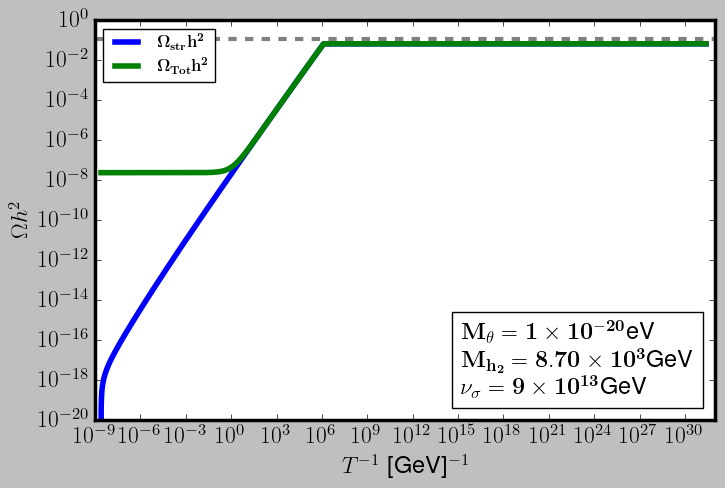

In [23]:
fig = plt.figure(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
plt.rc('text', usetex=True)

plt.loglog(1/time_to_temperature(t_),energy_density_DM[:,0]*mULA*2970/1.053e-5, lw = 4, label = "$\mathbf{\Omega_{str}h^2}$")

plt.loglog(1/time_to_temperature(t_),energy_density_DM[:,0]*mULA*2970/1.053e-5 + Abundance_mis(m_eV, vs), lw = 4, label = "$\mathbf{\Omega_{Tot}h^2}$")



plt.axhline(y = 0.11, color = 'gray', lw = 3, ls = 'dashed')


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = %s}$" %(sci_notation(m_eV, sig_fig=0)) +"eV" + '\n'\
                              r"$\mathbf{M_{h_2} = %s}$" %(sci_notation(mr, sig_fig=2)) + "GeV" + '\n'\
                              r"$\mathbf{\nu_\sigma = %s}$" %(sci_notation(vs, sig_fig=0)) +  "GeV"  , loc=4)

ax.add_artist(anchored_text_)

plt.legend(loc = 2, fontsize = 12)
plt.ylabel("$\Omega h^2 $")

plt.xlabel("$T^{-1}$ [GeV]$^{-1}$")

#plt.ylim(1.0e-5,1.0e3)
plt.show()